
## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.
Instructions

- **Download** this notebook as you would any other ipynb file 
- **Upload** to Google Colab or work locally (if you have that set-up)
- **Delete** `raise NotImplementedError()`

- **Write** your code in the `# YOUR CODE HERE` space


- **Execute** the Test cells that contain assert statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)

- **Save** your notebook when you are finished
- **Download** as a ipynb file (if working in Colab)
- **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)




## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron (i.e. Neural Network)
    - Analyze and Compare
4. [Keras MMP](#Q3)


____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

____

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**

- **Input Layer:** 

- **Hidden Layer:** 

- **Output Layer:**

- **Activation:** 

YOUR ANSWER HERE
- **Neuron:** This is the building block of a neural network. It is a mathematical function that accepts inputs, their weights plus a bias term and then passes them through an activation function (such as sigmoid, ReLu, tanh, etc.) which determines whether the neuron will activate or not. If the neuron activates, it then passes the updated weights and bias to the next layer or to the final output layer to make a prediction. If the neuron does not activate, the data is not passed onto the next layer.
- **Input Layer:** This is a collection of input neurons where the train/test data is passed to the neural network for analysis and prediction.
- **Hidden Layer:** A collection of neurons that accept the input data, weights, and biases, passes them through the activation function and determines how the weights and biases must be adjusted in order to be passed to additional hidden layer(s) or to the output layer to make a prediction.
- **Output Layer:** A collection of neurons that transforms the weights and biases from the last (or only) hidden layer into probabilities and makes a prediction based on those probabilities.
- **Activation:** This is the function within each hidden layer and the output layer which transforms the weights and biases coming into the layer and determines the adjustments that need to be made for the model to learn and ultimately make a correct prediction.

- `Explain` how Back-propagation works 
- `Explain` how Gradient Descent works (mention the learning rate)
- `Explain` how Back-propagation and Gradient Descent are related   

Use your own words, but feel free to reference external materials for this question. 

YOUR ANSWER HERE
- **Back-propagation:** This is the process of updating the weights/biases of a neural network model in reverse order from the output layer through the prior hidden layers at the end of a training epoch. In the next epoch the weights/biases for neurons that were responsible for higher contribution to the overall loss of the neural network are lowered and the weights/biases for neurons that were responsible for lower contribution to the overall loss of the neural network are increased. This allows for more efficient learning of the model and should lead to lower overall loss and higher prediction accuracy.
- **Gradient Descent:** Gradient is a derivative that takes on the form of a vector. A gradient points in the direction of the greatest change. Gradient Descent tries to reach the minimum of the loss function with respect to the parameters (weights/biases) using the derivatives calculated in the back-propagation. The easiest way would be to adjust the parameters by substracting its corresponding derivative multiplied by a learning rate, which regulates how much a model should move in the gradient direction. 
- **Back-propagation/Gradient Descent Relationship:** Gradient Descent tries to reach the minimum of the loss function for the model with respect to the parameters (weights/biases) using the derivatives calculated in the back-propagation. 

Remember our Simple Perceptron Class from Monday. 

- Describe the process of making a prediction, i.e. how do you go from inputs to outputs?

YOUR ANSWER HERE

Data/signal is passed from the input layer to the hidden layers and ultimately to the output layer (which makes the prediction):
- Each layer takes in inputs from the training data (or previous layer);
- Multiplies each input by its corresponding weight;
- Adds bias to this weighted sum of inputs and weights;
- Sends this weighted sum + bias through an activation function (sigmoid, ReLu, tanh, etc.).
- This final activated value is the data/signal that gets passed onto the next layer of the network.
- When the signal reaches the output layer, it converts the weights + biases into probabilities and makes a prediction.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using `Keras`. After you build these two models, compare the results of the model.

In [1]:
"""
Our Dataset
"""
import numpy as np


rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [2]:
X.shape

(300, 2)

In [3]:
y

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0])

In [4]:
2**2

4

In [5]:
4**4

256

This word is speled wrong. 

### Simple Perceptron
Construct a simple perceptron using Keras. 

Make sure to include the following in your model:
- Add `1 dense layer` with a `single neuron` 
- Use a `sigmoid activation function`
- Set `epochs` to 10 
- Use the version of `crossentropy loss` that is appropriate for this data.

Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 


In [6]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# build and fit model

# YOUR CODE HERE
# Initialize model as a Keras Sequential model
model1 =  Sequential()

# Add one Dense hidden layer with a single neuron with a 
# sigmoid activation function
model1.add(Dense(1, input_dim = X.shape[1], activation = 'sigmoid'))

# Compile model using binary_crossentropy for loss function (2 classes only)
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

# Fir model for 10 epochs
h1 = model1.fit(X, y, epochs = 10, validation_split = 0.2)

Epoch 1/10
8/8 [==============================] - 0s 18ms/step - loss: 0.7682 - accuracy: 0.5833 - val_loss: 0.8940 - val_accuracy: 0.4667
Epoch 2/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7668 - accuracy: 0.5833 - val_loss: 0.8916 - val_accuracy: 0.4667
Epoch 3/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.5833 - val_loss: 0.8894 - val_accuracy: 0.4667
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7643 - accuracy: 0.5833 - val_loss: 0.8872 - val_accuracy: 0.4667
Epoch 5/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7630 - accuracy: 0.5833 - val_loss: 0.8851 - val_accuracy: 0.4667
Epoch 6/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7618 - accuracy: 0.5833 - val_loss: 0.8829 - val_accuracy: 0.4833
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 0.7606 - accuracy: 0.5833 - val_loss: 0.8807 - val_accuracy: 0.5000
Epoch 8/10
8/8 [=================

In [7]:
# Visible test
assert len(model1.get_config()["layers"]) == 2, "Make sure you only create 1 Dense layer."
assert len(h1.epoch) <=10, "Did you make sure to set epochs to 10 or less?"

In [8]:
model1.get_config()["layers"]

[{'class_name': 'InputLayer',
  'config': {'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'sparse': False,
   'ragged': False,
   'name': 'dense_input'}},
 {'class_name': 'Dense',
  'config': {'name': 'dense',
   'trainable': True,
   'batch_input_shape': (None, 2),
   'dtype': 'float32',
   'units': 1,
   'activation': 'sigmoid',
   'use_bias': True,
   'kernel_initializer': {'class_name': 'GlorotUniform',
    'config': {'seed': None}},
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'bias_regularizer': None,
   'activity_regularizer': None,
   'kernel_constraint': None,
   'bias_constraint': None}}]

In [9]:
# Hidden tests - you will see the results when you submit to Canvas

### Multi-Layer Perceptron
Now construct a multi-layer perceptron model (also known as a neural network). 

Your neural network `must` have: 
- `2` Hidden Layers
- Select any number between `5-32` for the number of neurons in each hidden layers
- Your pick of activation function and optimizer
- Incorporate the `Callback function` below into your model
- Set epochs to `100`
- Your model should be called `model2` 
- Save the results of your fit statement to a variable called `h2`. 
- Use the version of `crossentropy loss` that is appropriate for this data.

In [10]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        # if model reaches 99% accuracy, training is terminated 
        acc_threshold = 0.99
        if(logs.get('accuracy') > acc_threshold):   
            self.model.stop_training = True
            self.model.callback_used = True

In [11]:
# build and fit model

# YOUR CODE HERE
# Initialize model as a Keras Sequential model
model2 =  Sequential()

# Instatiate a custom callback
callback = myCallback()

# Add 2 Dense hidden layers with 32/16 neurons with a 
# tanh activation function
model2.add(Dense(32, input_dim = X.shape[1], activation = 'tanh'))
model2.add(Dense(16, activation = 'tanh'))

# Set up output layer with a sigmoid activation function (2 classes only)
model2.add(Dense(1, activation = 'sigmoid'))

# Compile model using binary_crossentropy for loss function (2 classes only)
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = 'accuracy')

# Fir model for 100 epochs
h2 = model1.fit(X, y, 
                epochs = 100, 
                validation_split = 0.2, 
                callbacks=[callback])

Epoch 1/100
8/8 [==============================] - 0s 6ms/step - loss: 0.7561 - accuracy: 0.5875 - val_loss: 0.8730 - val_accuracy: 0.5000
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7547 - accuracy: 0.5875 - val_loss: 0.8712 - val_accuracy: 0.5000
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7538 - accuracy: 0.5875 - val_loss: 0.8691 - val_accuracy: 0.5167
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7526 - accuracy: 0.5875 - val_loss: 0.8672 - val_accuracy: 0.5167
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7515 - accuracy: 0.5875 - val_loss: 0.8654 - val_accuracy: 0.5167
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7504 - accuracy: 0.5875 - val_loss: 0.8636 - val_accuracy: 0.5167
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7495 - accuracy: 0.5875 - val_loss: 0.8615 - val_accuracy: 0.5167
Epoch 8/100
8/8 [==========

8/8 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.6167 - val_loss: 0.7847 - val_accuracy: 0.5333
Epoch 60/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7073 - accuracy: 0.6167 - val_loss: 0.7835 - val_accuracy: 0.5333
Epoch 61/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7066 - accuracy: 0.6167 - val_loss: 0.7825 - val_accuracy: 0.5333
Epoch 62/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.6167 - val_loss: 0.7813 - val_accuracy: 0.5333
Epoch 63/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7056 - accuracy: 0.6167 - val_loss: 0.7804 - val_accuracy: 0.5333
Epoch 64/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7052 - accuracy: 0.6167 - val_loss: 0.7794 - val_accuracy: 0.5333
Epoch 65/100
8/8 [==============================] - 0s 4ms/step - loss: 0.7046 - accuracy: 0.6167 - val_loss: 0.7784 - val_accuracy: 0.5333
Epoch 66/100
8/8 [===============

In [12]:
# Visible test
assert len(model2.get_config()["layers"]) == 4, "You should have 4 layers: Input, hidden 1, hidden 2, output."
assert 5 <= model2.get_config()["layers"][1]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 1, but don't."
assert 5 <= model2.get_config()["layers"][2]["config"]["units"] <= 32, "You should have 5 - 32 units in hidden layer 2, but don't."
assert h2.params["epochs"] == 100, "You didn't set epochs to 100."

In [13]:
# Hidden tests - you will see the results when you submit to Canvas

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. 

Install the package `mlxtend` into the environment you are using for the sprint challenge.

You can install this package using the following statement in the terminal

```python
pip install mlxtend
```

Or you can install this package using the following statement in your notebook

```python
!pip install mlxtend
```

If you choose to install this package from within your notebook, be sure to delete the install statement afterwards so that CodeGrade doesn't try to install it and potentially crash. 


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [14]:
X.shape, y.shape

((300, 2), (300,))

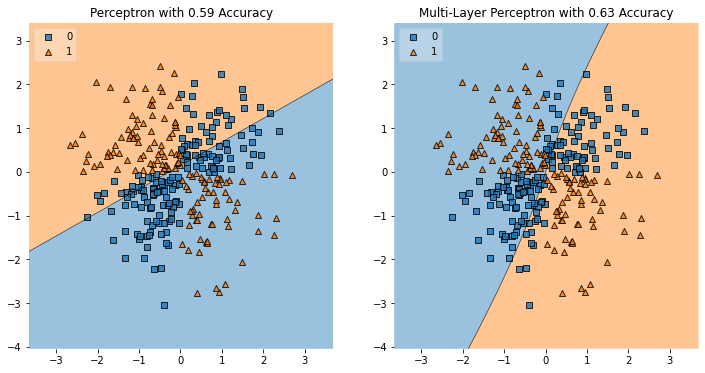

In [15]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions


fig = plt.figure(figsize=(12,6))

for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

1) Why does the Perceptron (`model1`) only achieve about 50% accuracy? 

2) What is the architectural property of the Multi-Layer Perceptron that allows it to more accurately learn the relationship between X and y? 
- Hint: recall that each layer represents a vector space and they usually have a different number of dimensions, $\mathbb{R}^N$.
   

YOUR ANSWER HERE
1. The single Perceptron (model1) only achieves about 50% accuracy because it only has 1 neuron and is essentially trying to fit a single line through data that is divided in four quarters.
2. The Multi-Layer Perceptron (model2) allows it to more accurately learn the relationship between X and y because it has 2 hidden layers that allow it to better learn non-linear relationships in data (such as X and y). In addition, model2 was ran for more epochs.

## 3. Keras MMP <a id="Q3"></a>

- Implement a Multilayer Perceptron architecture of your choosing using the Keras library. 
- Train your model and report its baseline accuracy. 
- Then `hyper-parameters tune two parameters each with no more than 2 values each`
    - Due to limited computational resources on CodeGrade `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE`
- Report your optimized model's accuracy
- Use the Heart Disease Dataset provided (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network.
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyper-parameters tune your model. 
    - **Use `n_jobs` = 1**
- When hyper-parameters tuning, show you work by adding code cells for each new experiment.
- Report the accuracy for each combination of hyper-parameters as you test them so that we can easily see which resulted in the highest accuracy.

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load data
data_path = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv'
df = pd.read_csv(data_path)
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
20,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [17]:
# Create an input matrix named 'X' store it in a 2D numpy array

# Create an output vector for the labels named 'Y', store it in 1D numpy array

# YOUR CODE HERE
X = np.array(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])
Y = np.array(df['target'])

In [18]:
X.shape

(303, 13)

In [19]:
# Visible Testing
assert X.shape[0] == 303, "Did you drop/lose some rows in X? Did you properly load and split the data?"
assert X.shape[1] == 13, "Did you drop/lose some columns in X? Did you properly load and split the data?"
assert len(Y)== 303, "Did you drop/lose some rows in Y? Did you properly load and split the data?"

In [20]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [21]:
# Create a function named 'create_model' that returns a compiled keras model -  required for KerasClassifier
# YOUR CODE HERE
def create_model(n_layers, first_layer_nodes, act_func, opt):
    """
    Creates a compiled Keras model with 3 hidden layers
    """
    # Calculate the nodes for the last layer
    last_layer_nodes = round((first_layer_nodes / n_layers))
    
    # Create a list of nodes for each layer and
    # Loop through the node list decreasing the nodes in each layer proportionately
    n_nodes = [first_layer_nodes]
    nodes_dec = round((last_layer_nodes - first_layer_nodes)/ (n_layers-1))
    
    for j in range(0, n_layers - 1):
        n_nodes.append((n_nodes[j] + nodes_dec))
    
    # Initialize model as a Keras Sequential model
    model =  Sequential()
    
    # Add Dense hidden n_layers with appropriate nodes & activation function
    for i in range(1, n_layers):
        if i == 1:
            model.add(Dense(first_layer_nodes, 
                            input_dim = X.shape[1], 
                            activation = act_func))
        else:
            model2.add(Dense(n_nodes[i-1], activation = act_func))

    # Set up output layer with a sigmoid activation function (2 classes only)
    model.add(Dense(1, activation = 'sigmoid'))

    # Compile model using binary_crossentropy for loss function (2 classes only)
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = opt, 
                  metrics = 'accuracy')
    
    return model


In [22]:
# Visible Testing
assert create_model().__module__ == 'tensorflow.python.keras.engine.sequential', "create_model should return a keras model that was created using the Sequential class."

TypeError: create_model() missing 4 required positional arguments: 'n_layers', 'first_layer_nodes', 'act_func', and 'opt'

In [23]:
# Pass 'create_model' into KerasClassifier, store KerasClassifier to a variable named 'model'
# YOUR CODE HERE
model = KerasClassifier(build_fn = create_model)

In [24]:
# Visible Testing
assert model.__module__ == 'tensorflow.python.keras.wrappers.scikit_learn', "model should be a instance of KerasClassifier."

AssertionError: model should be a instance of KerasClassifier.

In [25]:
base_model = create_model(n_layers = 3, 
                          first_layer_nodes =100, 
                          act_func = 'sigmoid', 
                          opt = 'sgd')

base_model.fit(X, Y, epochs =5, validation_split = 0.2)

Epoch 1/5
8/8 [==============================] - 0s 17ms/step - loss: 0.7578 - accuracy: 0.5496 - val_loss: 0.7124 - val_accuracy: 0.5246
Epoch 2/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5537 - val_loss: 0.6836 - val_accuracy: 0.5246
Epoch 3/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6802 - accuracy: 0.5331 - val_loss: 0.6633 - val_accuracy: 0.5246
Epoch 4/5
8/8 [==============================] - 0s 5ms/step - loss: 0.6700 - accuracy: 0.5496 - val_loss: 0.6485 - val_accuracy: 0.6885
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6655 - accuracy: 0.5909 - val_loss: 0.6487 - val_accuracy: 0.7377


In [26]:
print(f'Baseline Model Accuracy is: {base_model.evaluate(X, Y)[1]:2.4f}')

10/10 [==============================] - 0s 1ms/step - loss: 0.6603 - accuracy: 0.6634
Baseline Model Accuracy is: 0.6634


In [27]:
# Define the grid search parameters inside a dictionary named 'param_grid' 
# Use 2 hyper-parameters with 2 possible values for each 

# YOUR CODE HERE
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
This means the test in the cell below will fail.
"""
param_grid = {'n_layers': [5, 10],
              'first_layer_nodes': [256, 512],
              'act_func': ['tanh'], 
              'opt': ['adam']
             }

In [28]:
assert len(param_grid.keys()) == 2, "Did you create a param dict with 2 hyper-parameters as keys?"

AssertionError: Did you create a param dict with 2 hyper-parameters as keys?

In [29]:
# Create Grid Search object and name it 'gs'
# Run Grid Search 
# YOUR CODE HERE
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6477 - accuracy: 0.6485
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5895 - accuracy: 0.6980
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5853 - accuracy: 0.6980
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5656 - accuracy: 0.7178
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5682 - accuracy: 0.7030
Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6648 - accuracy: 0.5941
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5776 - accuracy: 0.7129
Epoch 3/5
7/7 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.7178
Epoch 4/5
7/7 [==============================] - 0s 2ms/step - loss: 0.5736 - accuracy: 0.6782
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6355 - accuracy: 0.7030
Epoch 1/5
7/7 [==============================] - 0

In [30]:
# your grid_result object should be able to run in this code 
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}") 

Best: 0.7062706549962362 using {'act_func': 'tanh', 'first_layer_nodes': 256, 'n_layers': 5, 'opt': 'adam'}
Means: 0.7062706549962362, Stdev: 0.004667370101995412 with: {'act_func': 'tanh', 'first_layer_nodes': 256, 'n_layers': 5, 'opt': 'adam'}
Means: 0.6897689700126648, Stdev: 0.012348721806606915 with: {'act_func': 'tanh', 'first_layer_nodes': 256, 'n_layers': 10, 'opt': 'adam'}
Means: 0.6798679828643799, Stdev: 0.0259868345848983 with: {'act_func': 'tanh', 'first_layer_nodes': 512, 'n_layers': 5, 'opt': 'adam'}
Means: 0.6798679828643799, Stdev: 0.024697427683176756 with: {'act_func': 'tanh', 'first_layer_nodes': 512, 'n_layers': 10, 'opt': 'adam'}


# GridSearch No. 2

In [31]:
model = KerasClassifier(build_fn = create_model)

In [32]:
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
"""
param_grid = {'n_layers': [3, 7],
              'first_layer_nodes': [32, 128],
              'act_func': ['tanh'], 
              'opt': ['adam']
             }

In [33]:
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 0s 3ms/step - loss: 0.7365 - accuracy: 0.5248
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.5396
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6684 - accuracy: 0.5396
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6561 - accuracy: 0.5941
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6931
Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 1.1091 - accuracy: 0.4604
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.9686 - accuracy: 0.4604
Epoch 3/5
7/7 [==============================] - 0s 1000us/step - loss: 0.8638 - accuracy: 0.4653
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.7756 - accuracy: 0.4752
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6778 - accuracy: 0.5545
Epoch 1/5
7/7 [==============================] 

In [34]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6435643434524536 using {'act_func': 'tanh', 'first_layer_nodes': 128, 'n_layers': 3, 'opt': 'adam'}
Means: 0.5841584205627441, Stdev: 0.07961936955087746 with: {'act_func': 'tanh', 'first_layer_nodes': 32, 'n_layers': 3, 'opt': 'adam'}
Means: 0.5874587496121725, Stdev: 0.07511421310425327 with: {'act_func': 'tanh', 'first_layer_nodes': 32, 'n_layers': 7, 'opt': 'adam'}
Means: 0.6435643434524536, Stdev: 0.021388576788767738 with: {'act_func': 'tanh', 'first_layer_nodes': 128, 'n_layers': 3, 'opt': 'adam'}
Means: 0.636963685353597, Stdev: 0.032671590713967885 with: {'act_func': 'tanh', 'first_layer_nodes': 128, 'n_layers': 7, 'opt': 'adam'}


# GridSearch No. 3

In [35]:
model = KerasClassifier(build_fn = create_model)

In [36]:
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
"""
param_grid = {'n_layers': [5, 25],
              'first_layer_nodes': [10, 300],
              'act_func': ['tanh'], 
              'opt': ['adam']
             }

In [37]:
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 1.5073 - accuracy: 0.5198
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 1.4752 - accuracy: 0.5198
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 1.4430 - accuracy: 0.5198
Epoch 4/5
7/7 [==============================] - 0s 2ms/step - loss: 1.4108 - accuracy: 0.5198
Epoch 5/5
4/4 [==============================] - 0s 988us/step - loss: 1.1622 - accuracy: 0.5941
Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8673 - accuracy: 0.5396
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8474 - accuracy: 0.5396
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8296 - accuracy: 0.5396
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8141 - accuracy: 0.5396
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7653 - accuracy: 0.5545
Epoch 1/5
7/7 [==============================] -

In [38]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6501650015513102 using {'act_func': 'tanh', 'first_layer_nodes': 300, 'n_layers': 5, 'opt': 'adam'}
Means: 0.5445544620354971, Stdev: 0.0450105003472179 with: {'act_func': 'tanh', 'first_layer_nodes': 10, 'n_layers': 5, 'opt': 'adam'}
Means: 0.5346534649531046, Stdev: 0.06416575795789252 with: {'act_func': 'tanh', 'first_layer_nodes': 10, 'n_layers': 25, 'opt': 'adam'}
Means: 0.6501650015513102, Stdev: 0.012348700566578033 with: {'act_func': 'tanh', 'first_layer_nodes': 300, 'n_layers': 5, 'opt': 'adam'}
Means: 0.6501650015513102, Stdev: 0.01866948040798165 with: {'act_func': 'tanh', 'first_layer_nodes': 300, 'n_layers': 25, 'opt': 'adam'}


# GridSearch No. 4

In [39]:
model = KerasClassifier(build_fn = create_model)

In [40]:
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
"""
param_grid = {'n_layers': [10],
              'first_layer_nodes': [500],
              'act_func': ['relu', 'elu'], 
              'opt': ['Nadam', 'RMSprop']
             }

In [41]:
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 1s 1ms/step - loss: 2.9036 - accuracy: 0.4406
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 1.8364 - accuracy: 0.4554
Epoch 3/5
7/7 [==============================] - 0s 2ms/step - loss: 1.0142 - accuracy: 0.5990
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 1.3057 - accuracy: 0.5743
Epoch 5/5
4/4 [==============================] - 0s 987us/step - loss: 1.3202 - accuracy: 0.5248
Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: 3.9136 - accuracy: 0.4604
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 1.7221 - accuracy: 0.5396
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 1.0673 - accuracy: 0.5891
Epoch 4/5
7/7 [==============================] - 0s 2ms/step - loss: 0.9174 - accuracy: 0.6931
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.7029 - accuracy: 0.6931
Epoch 1/5
7/7 [==============================] -

In [42]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6402640144030253 using {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'RMSprop'}
Means: 0.5907590786616007, Stdev: 0.07335347903298906 with: {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Nadam'}
Means: 0.6402640144030253, Stdev: 0.023336850509977063 with: {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'RMSprop'}
Means: 0.6402640144030253, Stdev: 0.028390503971451875 with: {'act_func': 'elu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Nadam'}
Means: 0.5874587496121725, Stdev: 0.02034459460670113 with: {'act_func': 'elu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'RMSprop'}


# GridSearch No. 5

In [43]:
model = KerasClassifier(build_fn = create_model)

In [44]:
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
"""
param_grid = {'n_layers': [10],
              'first_layer_nodes': [500],
              'act_func': ['relu', 'selu'], 
              'opt': ['Ftrl', 'Adamax']
             }

In [45]:
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: 1.5212 - accuracy: 0.5495
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 1.3956 - accuracy: 0.4901
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8547 - accuracy: 0.5644
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8289 - accuracy: 0.5545
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6369 - accuracy: 0.6634
Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: 4.2220 - accuracy: 0.3960
Epoch 2/5
7/7 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.4802
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 1.0166 - accuracy: 0.4851
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.8543 - accuracy: 0.5198
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 1.0044 - accuracy: 0.5644
Epoch 1/5
7/7 [==============================] - 0

In [46]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.6600660085678101 using {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Adamax'}
Means: 0.6171617110570272, Stdev: 0.04068918921340226 with: {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Ftrl'}
Means: 0.6600660085678101, Stdev: 0.04736865105500342 with: {'act_func': 'relu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Adamax'}
Means: 0.5247524678707123, Stdev: 0.10876076372872899 with: {'act_func': 'selu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Ftrl'}
Means: 0.6600660085678101, Stdev: 0.03267161680487577 with: {'act_func': 'selu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Adamax'}


# GridSearch No. 6

In [47]:
model = KerasClassifier(build_fn = create_model)

In [48]:
"""
Because create_model as written requires 4 arguments,param_grid has to 
include 4 arguments even though it only tests 2 arguments for the GridSearch.
"""
param_grid = {'n_layers': [10],
              'first_layer_nodes': [500],
              'act_func': ['tanh', 'selu'], 
              'opt': ['adam', 'Adamax']
             }

In [49]:
gs = GridSearchCV(estimator = model,
                 param_grid = param_grid,
                 n_jobs = 1,
                 cv = 3)

grid_result = gs.fit(X, Y, epochs = 5)

Epoch 1/5
7/7 [==============================] - 0s 1ms/step - loss: 0.7312 - accuracy: 0.5248
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6683
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5919 - accuracy: 0.6683
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5634 - accuracy: 0.7178
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.7228
Epoch 1/5
7/7 [==============================] - 0s 2ms/step - loss: 0.8413 - accuracy: 0.5446
Epoch 2/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.6782
Epoch 3/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5805 - accuracy: 0.6683
Epoch 4/5
7/7 [==============================] - 0s 1ms/step - loss: 0.5772 - accuracy: 0.6733
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6620 - accuracy: 0.6634
Epoch 1/5
7/7 [==============================] - 0

In [50]:
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Best: 0.7029703060785929 using {'act_func': 'tanh', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'adam'}
Means: 0.7029703060785929, Stdev: 0.02800424870987148 with: {'act_func': 'tanh', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'adam'}
Means: 0.646864672501882, Stdev: 0.025986816922028384 with: {'act_func': 'tanh', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Adamax'}
Means: 0.6798679828643799, Stdev: 0.020344617168058445 with: {'act_func': 'selu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'adam'}
Means: 0.6732673247655233, Stdev: 0.024252390796650362 with: {'act_func': 'selu', 'first_layer_nodes': 500, 'n_layers': 10, 'opt': 'Adamax'}


# Conclusion:
Higest Accuracy achieved is 0.7063 with the following tuned hyperparameters:
- 5 Dense hidden layers;
- 256 first layer neurons;
- a 'tanh' (Hyperbolic tangent) activation function; and
- an 'adam' optimizer